In [12]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams['figure.dpi']  = 200

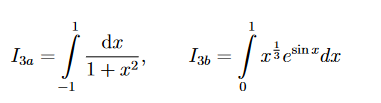

In [13]:

def TrapezeIntegral(Function : callable, a :float, b : float, steps : int) -> float:
    result = 0.0
    X = np.linspace(a, b ,steps+1)
    for i in range(1, steps+1):
        result += (Function(X[i])+Function(X[i-1]))
    result = result * ((b-a)/(2*steps))
    return result

# def TrapezeIntegral2(Function : callable, a : float , b : float , steps : int) -> float:
#     assert(steps>=1)
#     X = np.linspace(a, b ,steps)
#     I = np.arange(1, steps)
#     result = (b-a)/(2*steps)*np.sum(Function(X[I])+Function(X[I-1]))
#     return result


# def SimpsonIntegral(Function : callable, a : float, b : float, steps : int) -> float:
#     assert(steps%2==0)
#     h = (b-a)/steps
#     X = np.linspace(a+h, b-h, steps-1)
#     result = (h/3) * (Function(a) + Function(b) + np.sum(Function(X[::2])*4) +  np.sum(Function(X[1::2])*2))
#     return result

# def SimpsonIntegral2(Function : callable, a : float, b : float, steps : int) -> float:
#     assert(steps>=1)
#     X = np.linspace(a, b ,steps)
#     I = np.arange(0, steps)
#     result = np.sum(Function(X[I])+Function(X[I-1]) + Function((X[I]+X[I-1])/2) * (X[I]-X[I-1])/6)
#     return result

def SimpsonIntegral(Function : callable, a : float, b : float, steps : int) -> float:
    assert(steps%2==0)
    h = (b-a)/steps
    X = np.linspace(a+h, b-h, steps-1)
    result = Function(a) + Function(b)
    x = a
    for i in range(steps - 1):
        x += h
        if (i%2 == 0):
            result += Function(x)*4
        else:
            result += Function(x)*2
    result *= (h/3)
    return result


In [14]:
def f1(x):
    return 1/(1+x**2)

def f2(x):
    return (np.sign(x) * (np.abs(x)) ** (1 / 3))*np.exp(np.sin(x))

In [15]:
def compare_numeric_integrals(Function : callable, a :float, b : float, step_limit : int = 10):
    steps = (2**(np.arange(step_limit)+2))
    data = []
    i = 0
    
    for step in steps:
        s1 = TrapezeIntegral(Function, a, b, step)
        s2 = SimpsonIntegral(Function, a, b, step)
        diff = np.abs(s1-s2)
        data.append([step, s1, s2])
    X = np.linspace(-1, 1, steps[-1])
    plt.plot(X, Function(X), label=f"{steps[-1]} steps")
    plt.xlim(a,b)
    plt.ylim(-2,2)
    plt.legend()
    plt.show()

    
    df = pd.DataFrame(np.array(data), columns=['Steps', 'Trapeze', 'Simpson'])
    return df    

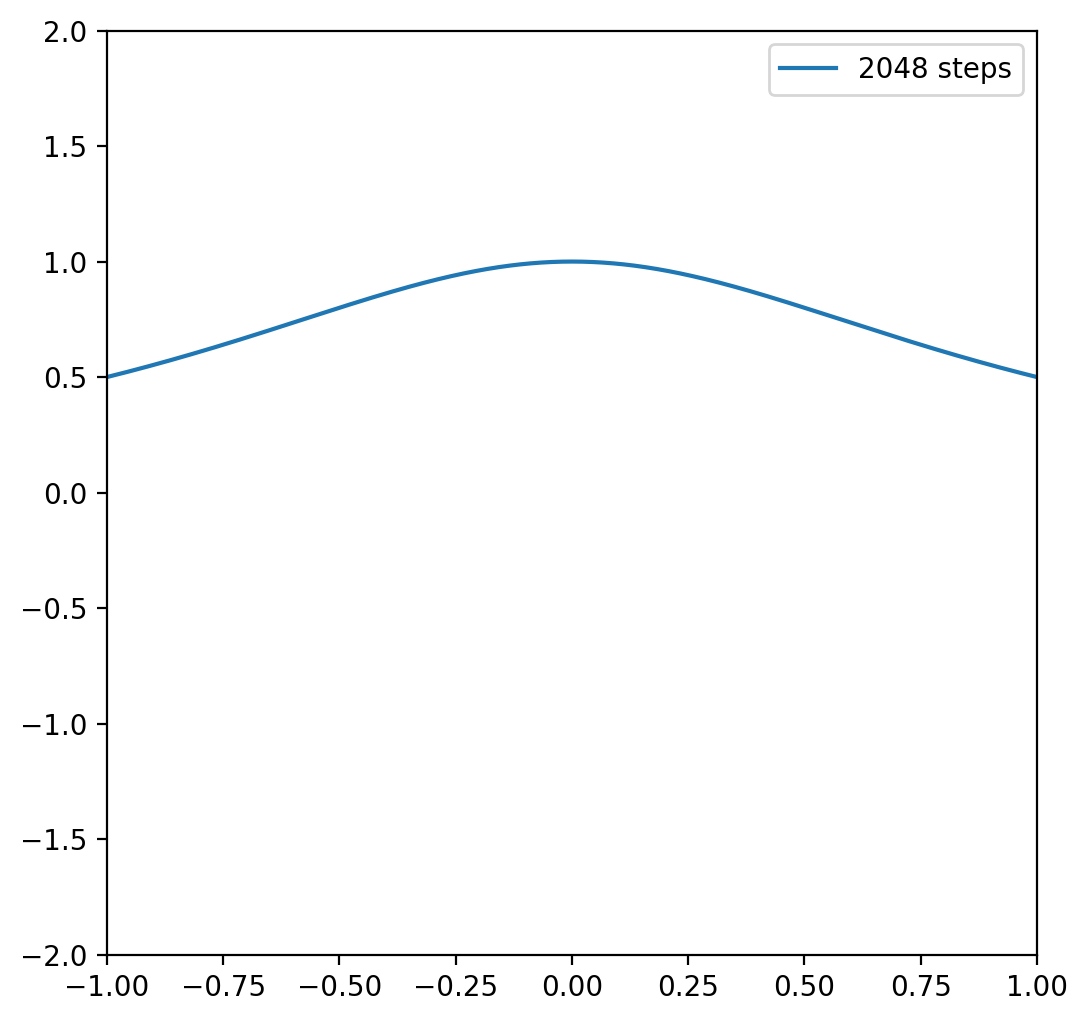

Exact solution: 1.5707963267948966


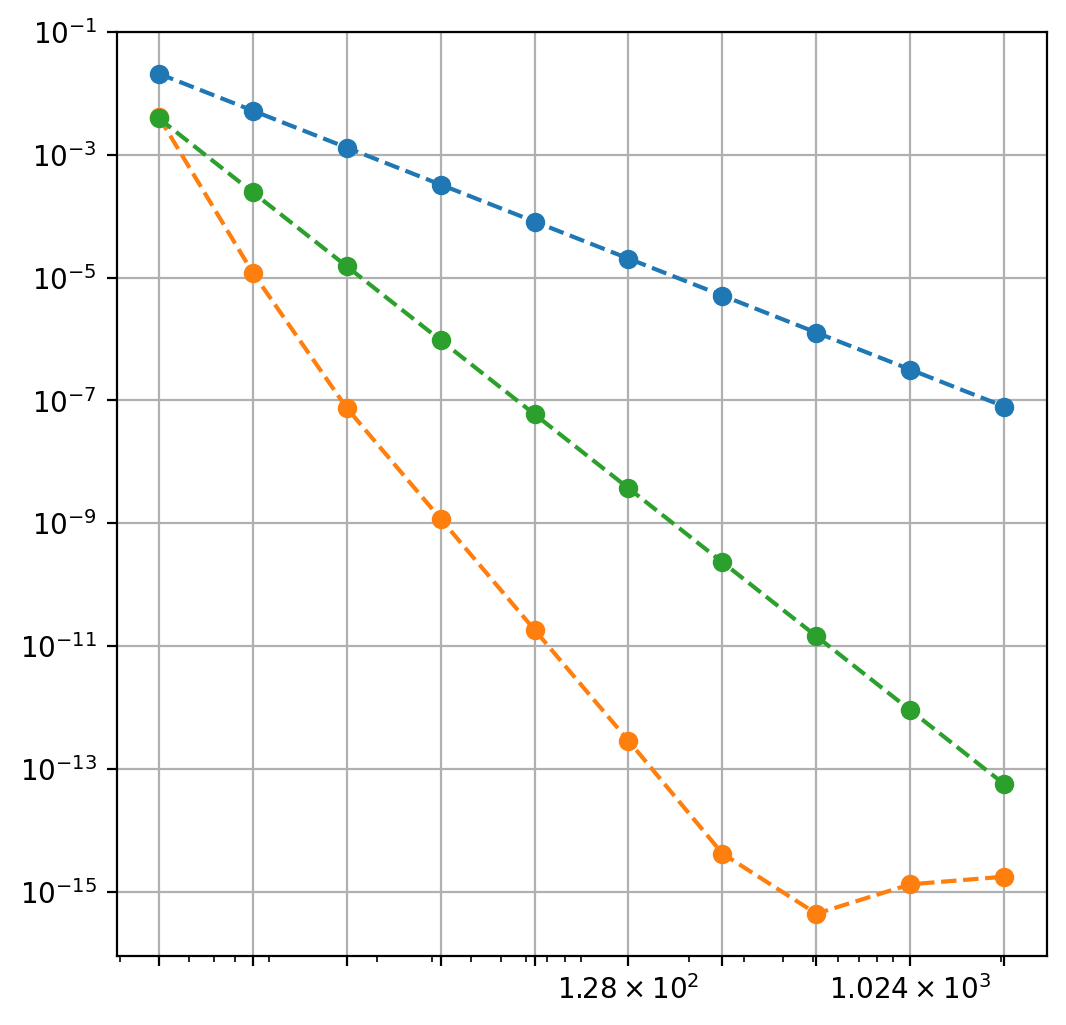

,Steps,Trapeze,Simpson,Trapeze Diff Abs,Trapeze Diff,Simpson Diff Abs,Simpson Diff
0,4.0,1.550000,1.566667,2.079633e-02,1.323935e-02,4.129660e-03,2.629023e-03
1,8.0,1.565588,1.570784,5.208092e-03,3.315574e-03,1.201307e-05,7.647758e-06
2,16.0,1.569494,1.570796,1.302080e-03,8.289296e-04,7.556554e-08,4.810652e-08
3,32.0,1.570471,1.570796,3.255208e-04,2.072330e-04,1.182485e-09,7.527935e-10
4,64.0,1.570715,1.570796,8.138021e-05,5.180825e-05,1.847922e-11,1.176424e-11
5,128.0,1.570776,1.570796,2.034505e-05,1.295206e-05,2.899903e-13,1.846135e-13
6,256.0,1.570791,1.570796,5.086263e-06,3.238016e-06,4.218847e-15,2.685802e-15
7,512.0,1.570795,1.570796,1.271566e-06,8.095039e-07,4.440892e-16,2.827160e-16
8,1024.0,1.570796,1.570796,3.178914e-07,2.023760e-07,1.332268e-15,8.481479e-16
9,2048.0,1.570796,1.570796,7.947286e-08,5.059399e-08,1.776357e-15,1.130864e-15


In [18]:
df = compare_numeric_integrals(f1, -1.0, 1.0)
exact_solution = np.pi/2
print(f"Exact solution: {exact_solution}")
df['Trapeze Diff Abs'] = np.abs(exact_solution - df['Trapeze'])
df['Trapeze Diff'] = np.abs((exact_solution - df['Trapeze'])/exact_solution)
df['Simpson Diff Abs'] = np.abs(exact_solution - df['Simpson'])
df['Simpson Diff'] = np.abs((exact_solution - df['Simpson'])/exact_solution)

plt.plot(df['Steps'], df['Trapeze Diff Abs'], '--o')
plt.plot(df['Steps'], df['Simpson Diff Abs'], '--o')
plt.plot(df['Steps'], 1/(df['Steps']**4), '--o')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xticks(df['Steps'])
plt.show()
display(df)


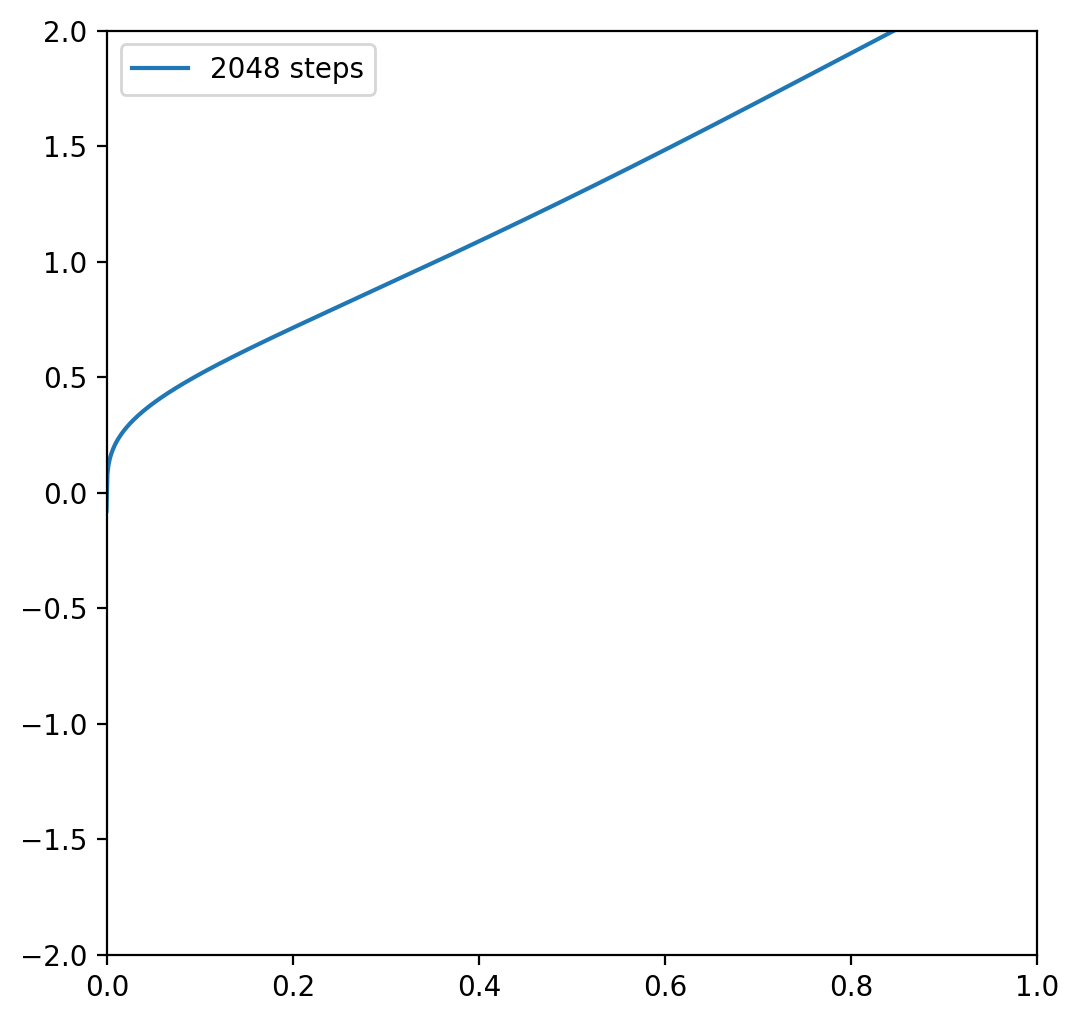

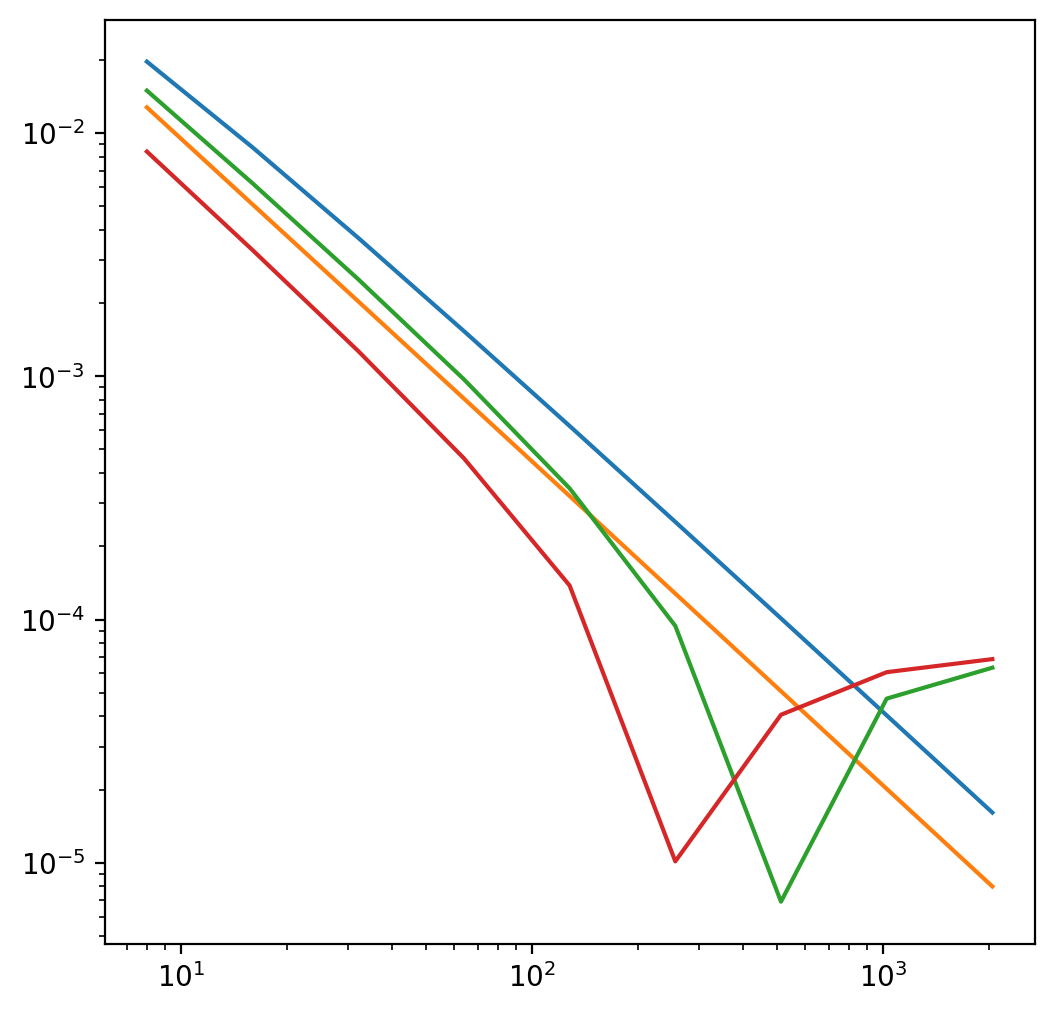

,Steps,Trapeze,Simpson,Diff,a
0,4.0,1.261237,1.274677,0.013440,0.000000
1,8.0,1.280871,1.287416,0.006545,0.019634
2,16.0,1.289593,1.292500,0.002907,0.008722
3,32.0,1.293297,1.294531,0.001235,0.003704
4,64.0,1.294829,1.295340,0.000511,0.001533
5,128.0,1.295454,1.295662,0.000208,0.000624
6,256.0,1.295706,1.295790,0.000084,0.000252
7,512.0,1.295807,1.295841,0.000034,0.000101
8,1024.0,1.295847,1.295861,0.000013,0.000040
9,2048.0,1.295863,1.295869,0.000005,0.000016


In [53]:
df = compare_numeric_integrals(f2, 0, 1)
df['Diff'] = np.abs(df['Simpson'] - df['Trapeze'])
# plt.plot(df['Steps'], df['Diff'], '--')

rootOfF2 = 1.2958

a = np.abs(np.diff(df['Trapeze'].values))
b = np.abs(np.diff(df['Simpson'].values))
c = np.abs(df['Trapeze'].values - rootOfF2)
d = np.abs(df['Simpson'].values - rootOfF2)

df["a"] = np.insert(a, 0,0)
plt.plot(df['Steps'][1:], a, label='local trapeze diff')
plt.plot(df['Steps'][1:], b, label='local simpson diff')
plt.plot(df['Steps'][1:], c[1:], label='trapeze - aprox')
plt.plot(df['Steps'][1:], d[1:], label='simpson - aprox')
# plt.plot(df['Steps'][1:], 1/(df['Steps'][1:]**4))
plt.xticks(df['Steps'][1:])
plt.xscale('log')
plt.yscale('log')
plt.show()
display(df)
